In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [2]:
df=pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let's see the description or the overview of complete data.

In [4]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### We can see that there are 16 columns which give tremendous amount of information.

In [6]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### We see that thre are many missing values in the columns.
The presence of NULL values in **name** and **host_id** don't make difference as they are not important for our analysis.
In **last_review** column, we cannot perform any operation as the values are simply not available.
For, **reviews_per_month** we impute the value 0.0 .

In [7]:
df.drop(['id','host_name','last_review'], axis=1, inplace=True)

## Data Exploration and Data Visualization :

## Let's begin with analyzing names:

To analyze this first we'll create an empty list of all the words and then count the number of occurences of each word. So that we get the most popular terms used in airbnb services.

In [8]:
names=[]
upper=[]
for i in df.name:
    j=str(i).split()
    upper.append(j)
for i in upper:
    for j in i:
        names.append(j.lower())
from collections import Counter
#let's see top 20 used words
top_20=Counter(names).most_common()
top_20=top_20[0:20]
top_20

[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820)]

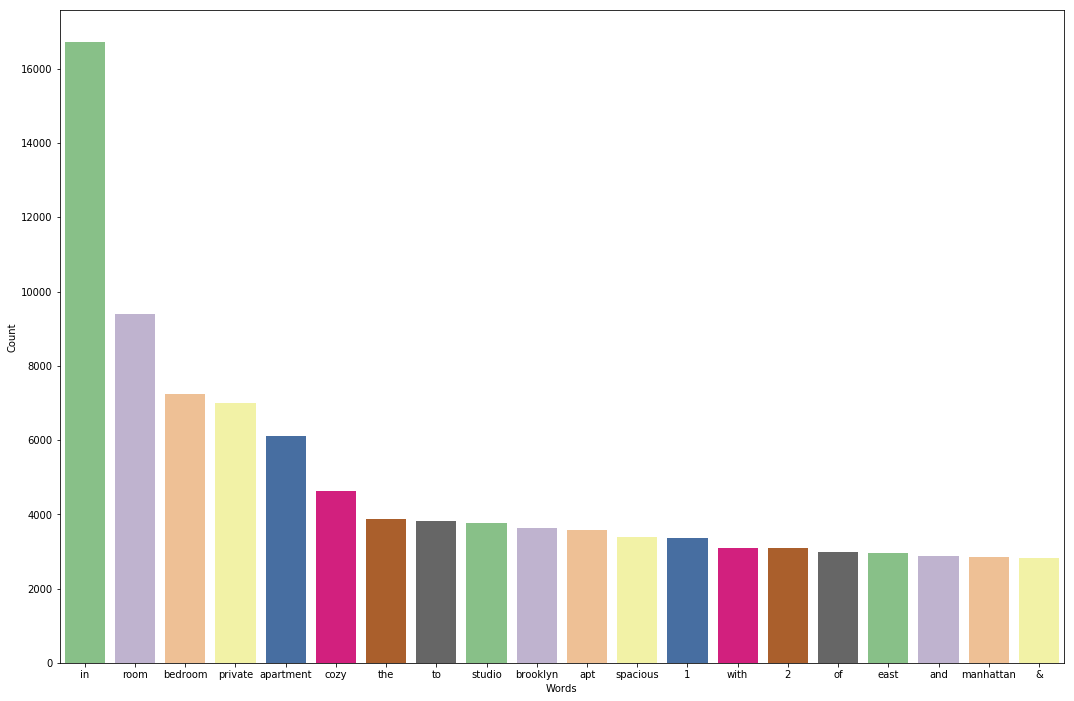

In [9]:
nd=pd.DataFrame(top_20)
nd=nd.rename(columns={0:'Words', 1:'Count'})
plt.figure(figsize=(18,12))
sns.barplot(nd['Words'], nd['Count'], palette='Accent')

We can clearly observe that words like `room, bedroom, private, apartment, cozy` are widely used rather than some catchy headlines that are expected to be used for marketing.

In [10]:
# Analysing the uniques present..
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
# Analysing the uniques present..
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [12]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

#### Doing the above steps we got to know about the categorical variables.

### Let's examine host_id

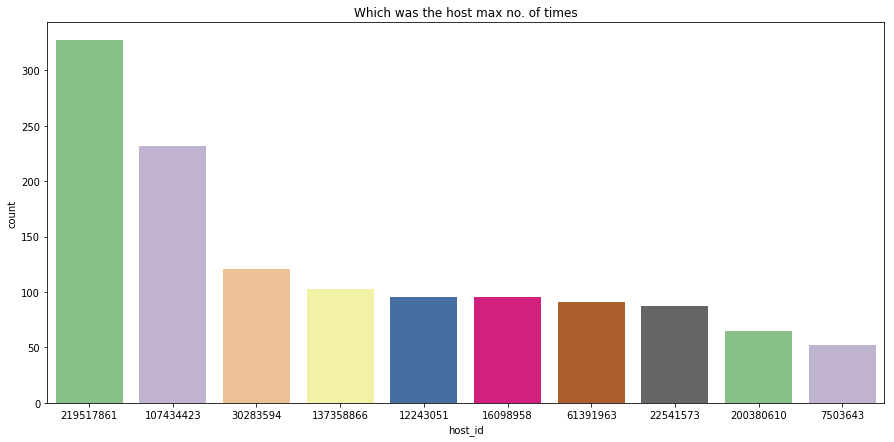

In [13]:
plt.figure(1, figsize=(15, 7))
plt.title("Which was the host max no. of times")
sns.countplot(x = "host_id", order=df['host_id'].value_counts().index[0:10] ,data=df,palette='Accent')

These are the **hosts** that take the maximum advantage of the airbnb services. We can see that top host has 327 listings in it followed by others.

### Let's Examine the neighbourhood_group with prices

In [14]:

roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = roomdf.index
values = roomdf.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

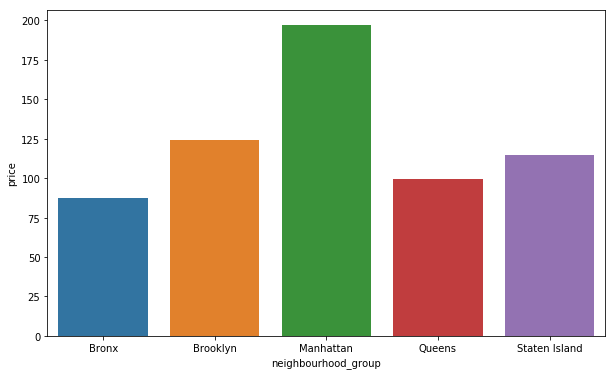

In [15]:
avg_=df.groupby('neighbourhood_group',as_index=False)['price'].mean()
plt.figure(figsize=(10,6))
sns.barplot(avg_['neighbourhood_group'], avg_['price'])

We see that **Manhattan** has the highest mean price. And the trend is:
    * Manhattan
    * Brooklyn
    * Queens
    * Staten Island
First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

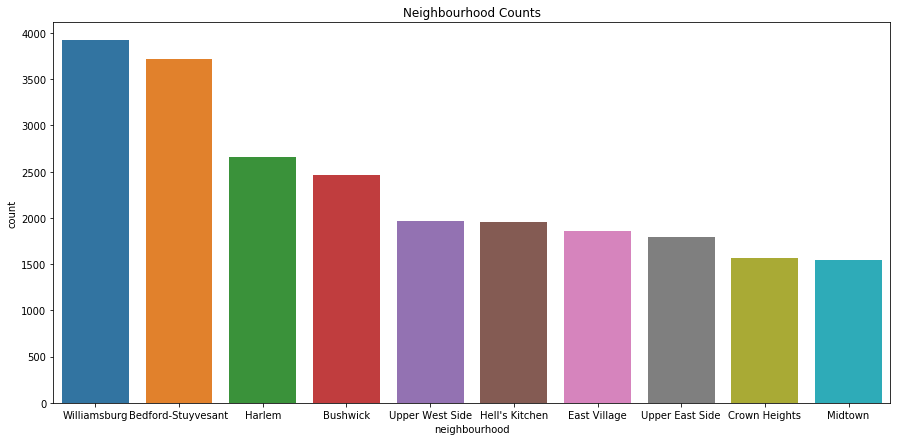

In [16]:
plt.figure(1, figsize=(15, 7))
plt.title("Neighbourhood Counts")
sns.countplot(x = "neighbourhood", order=df['neighbourhood'].value_counts().index[0:10] ,data=df)

In [17]:
neighbour_df =df.pivot_table(['price', 'number_of_reviews', 'calculated_host_listings_count', 'neighbourhood_group' ] ,abs
                             ['neighbourhood'], aggfunc='mean').reset_index()

fig = px.scatter(neighbour_df, x="neighbourhood", y="price", color="calculated_host_listings_count",
                 size='price', height=500, width=800)
fig.update_layout(showlegend = False)
fig.show()

TypeError: 'builtin_function_or_method' object is not subscriptable

These are **top 10** neighbourhoods.

## Room Type:

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



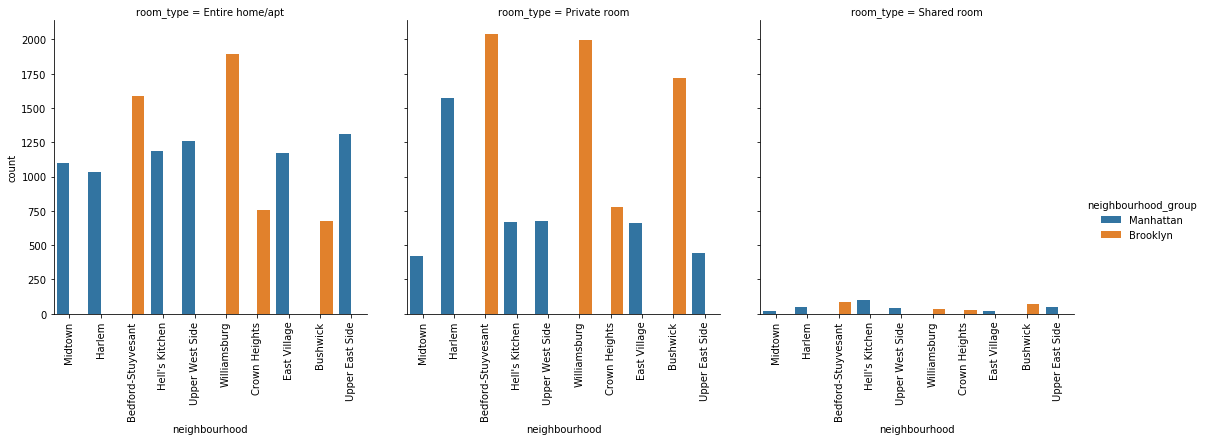

In [18]:
#taking top 10 neighbourhoods
nei=df.loc[df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                                               'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side',
                                               'Crown Heights','Midtown'])]
#using factorplot to represent multiple interesting attributes together and a count
plot=sns.factorplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=nei, kind='count')
plot.set_xticklabels(rotation=90)

We see that there are three plots. As we see that there are 2 parameters column and hue and these are the factors which are respomsible for separation of **Factor Plot**. We see that **shared room is barely available** in top 10 listing. **Manhattan and Brooklyn** are the most travelled locations. We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

## Latitude and Longitude Columns:

#### We compare price based on location on the map.

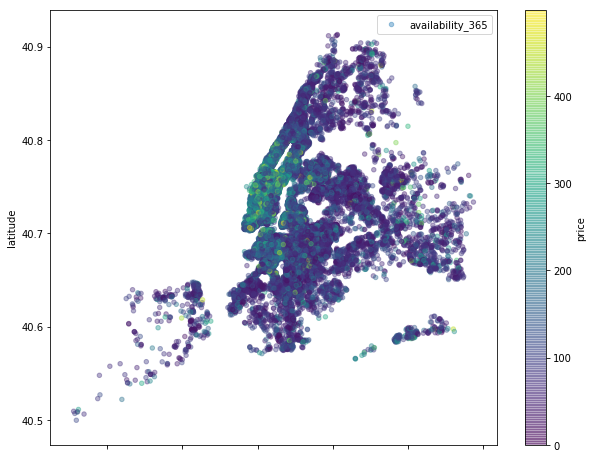

In [19]:
req=df[df.price<500]
plot=req.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap(), colorbar=True, alpha=0.4, figsize=(10,8))

#### We clearly see the representations of Latitudes and Longitudes in the above map.

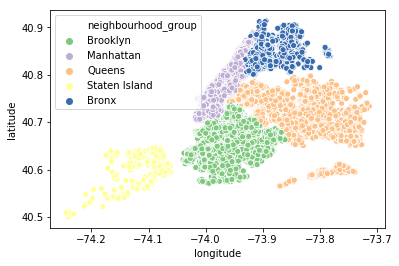

In [20]:
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group,palette='Accent')

We can see the locatiom of various neighbourhood groups on map of **NYC** as shown above.

## No. of Reviews

In [21]:
top=df.nlargest(10,'number_of_reviews')
top

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


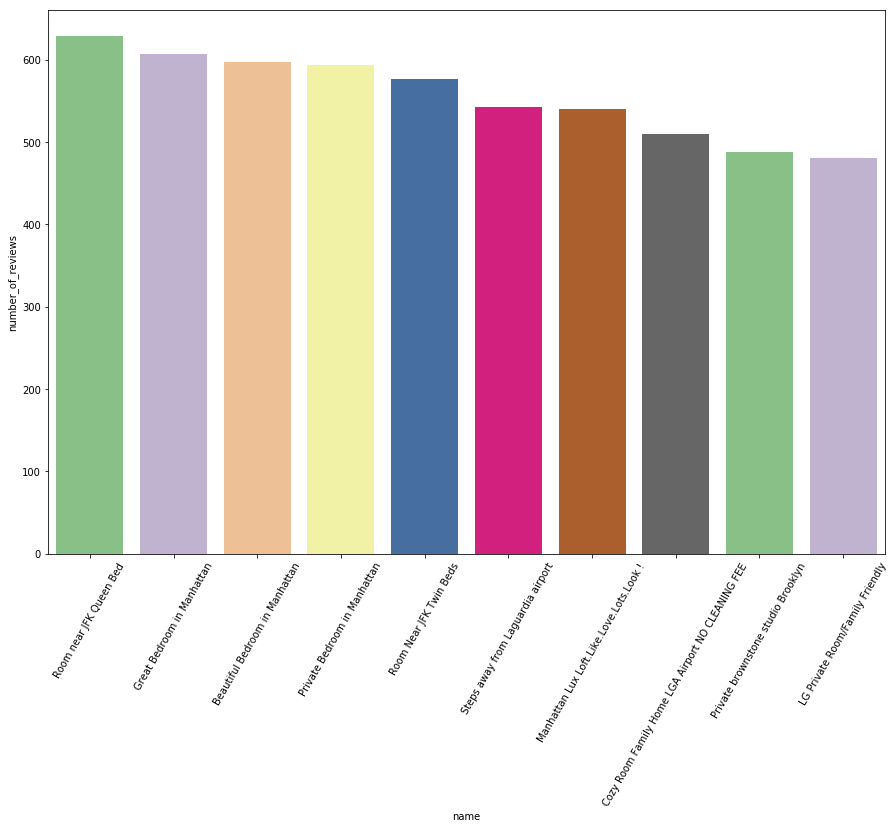

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=60)
sns.barplot(top['name'], top['number_of_reviews'], palette='Accent')

We can infer that top reviews have come from the area `Herlem` and most of the people have opted for a `Private room` and most reviews are from **Room near JFK Queen Bed** which is from Jamaica neighbourhood.

## Price

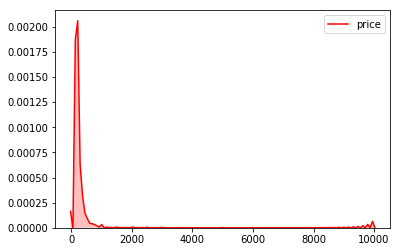

In [23]:
sns.kdeplot(df['price'],shade=True,color='r')

As we can see that the price distribution is very unevenly distributed, with most being low priced.
So there is no use of finding mean of the prices as it will have affect of outliers.

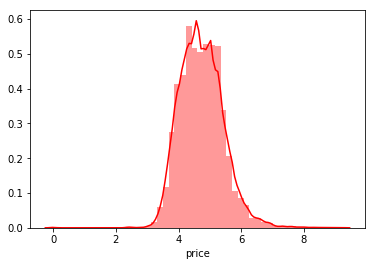

In [24]:
import scipy.stats as stats
sns.distplot(np.log1p(df['price']),color='r')

#### We see that the price distribution follows log(1+p) distriburtion.

### ` Follow me on Kaggle for getting more of such resources.`